In [ ]:
# Lab date: 24/09/2025
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import sklearn.datasets as dt
import numpy.random as rd
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, roc_curve, precision_recall_curve, auc
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_val_predict,train_test_split


print(sklearn.__version__)


1.6.1


In [ ]:
D=dt.load_breast_cancer()
print(D.DESCR) # descrição do dataset

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [ ]:
X=D.data # dados do dataset
y=D.target # classes

print(X.shape) # (Linhas, Colunas) ou (Numero de dados, parametros por dado)
print(y.shape) # 0 -> malignos, 1 -> benignos (negativo / positivo)
print(np.sum(y==0)) # 212 dados malignos
print(np.sum(y==1))

(569, 30)
(569,)
212
357


In [ ]:
# Inverter as classes (0 passa para 1, 1 passa para 0)
y=1-y # 1 -> passa a ser maligno


X1,X2,y1,y2 = train_test_split(X,y,test_size=1/3,random_state=42, stratify=y)  # stratify -> manter a mesma % de positivos e negativos do que o conjunto de teste
# x1 -> dados de treino, x2-> dados de teste

print(X1.shape)
print(X2.shape)

(379, 30)
(190, 30)


In [ ]:
lr = LogisticRegression(max_iter=5000, random_state=42).fit(X1,y1) # treinar com conjunto de treino

y2e = lr.predict(X2)

print(confusion_matrix(y2,y2e))
print(classification_report(y2,y2e))

[[118   1]
 [ 10  61]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.96       119
           1       0.98      0.86      0.92        71

    accuracy                           0.94       190
   macro avg       0.95      0.93      0.94       190
weighted avg       0.95      0.94      0.94       190



(30,)
[-26.46494388]


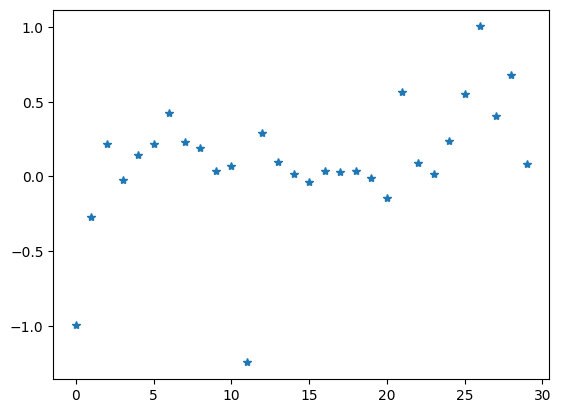

In [ ]:
w=lr.coef_
w=w.squeeze() # remover dimensão extra (1,30) -> (30,) / w1, wd -> parametros das funções de classificação
print(w.shape)
print(lr.intercept_) #w0

plt.plot(w, '*')
plt.show()

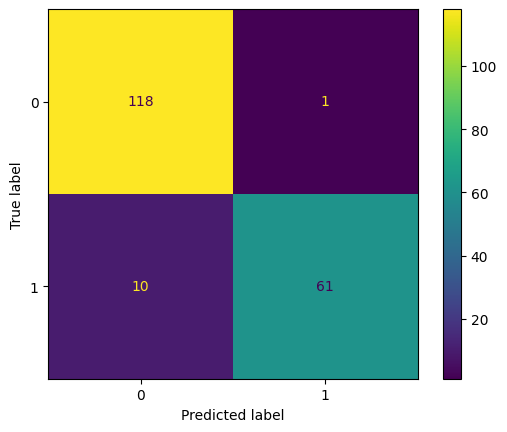

In [ ]:
ConfusionMatrixDisplay.from_estimator(lr,X2,y2)
plt.show()

[[113   6]
 [  1  70]]
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       119
           1       0.92      0.99      0.95        71

    accuracy                           0.96       190
   macro avg       0.96      0.97      0.96       190
weighted avg       0.97      0.96      0.96       190

[[118   1]
 [ 10  61]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.96       119
           1       0.98      0.86      0.92        71

    accuracy                           0.94       190
   macro avg       0.95      0.93      0.94       190
weighted avg       0.95      0.94      0.94       190



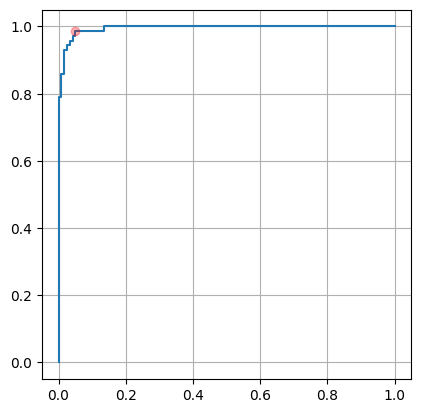

In [ ]:
y2dc = lr.decision_function(X2) # dados de teste (limiar para -2)
print(confusion_matrix(y2,y2dc>-2)) # > 0 - limiar de corte para a classificação
print(classification_report(y2,y2dc>-2))
y2dc = lr.decision_function(X2) # dados de teste
print(confusion_matrix(y2,y2dc>0)) # > 0 - limiar de corte para a classificação
print(classification_report(y2,y2dc>0))

fp, tp, _ = roc_curve(y2,y2dc) # roc_curve tem de levar o valor discreto, e depois um valor continuo da previsão. fp = false positive, tp = true positive

plt.plot(fp,tp)
plt.plot(6/(113+6), 70 / 71,'or',alpha=0.3)

plt.axis([0,1,0,1])
plt.axis('scaled')
plt.grid(True)
plt.show()



[[118   1]
 [ 10  61]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.96       119
           1       0.98      0.86      0.92        71

    accuracy                           0.94       190
   macro avg       0.95      0.93      0.94       190
weighted avg       0.95      0.94      0.94       190



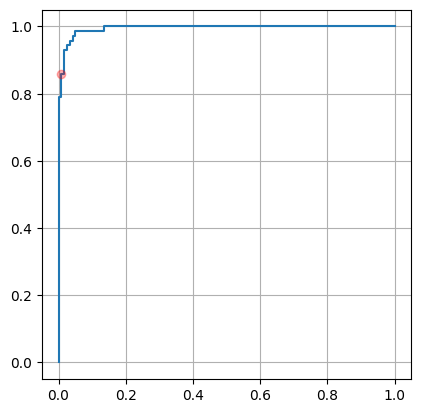

In [ ]:
y2dc = lr.decision_function(X2) # dados de teste. classificador original (limiar original)

print(confusion_matrix(y2,y2dc>0)) # > 0 - limiar de corte para a classificação
print(classification_report(y2,y2dc>0))

fp, tp, _ = roc_curve(y2,y2dc) # roc_curve tem de levar o valor discreto, e depois um valor continuo da previsão. fp = false positive, tp = true positive

plt.plot(fp,tp)
plt.plot(1/(113+6), 61 / 71,'or',alpha=0.3)

plt.axis([0,1,0,1])
plt.axis('scaled')
plt.grid(True)
plt.show()


[[118   1]
 [ 10  61]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.96       119
           1       0.98      0.86      0.92        71

    accuracy                           0.94       190
   macro avg       0.95      0.93      0.94       190
weighted avg       0.95      0.94      0.94       190



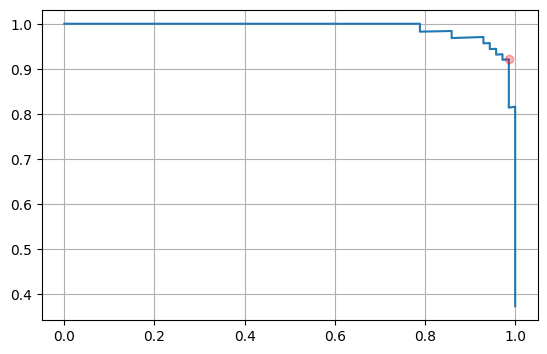

In [ ]:
y2dc = lr.decision_function(X2) # dados de teste. classificador original (limiar original). valores continuos

print(confusion_matrix(y2,y2dc>0)) # > 0 - limiar de corte para a classificação
print(classification_report(y2,y2dc>0))

pr, rc, t = precision_recall_curve(y2,y2dc) # roc_curve tem de levar o valor discreto, e depois um valor continuo da previsão. fp = false positive, tp = true positive

plt.plot(rc,pr)
plt.plot(70/71, 70/76,'or',alpha=0.3)

plt.axis([0,1,0,1])
plt.axis('scaled')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier # classificação -> numero inteiro, regressão -> numero contínuo

rf = RandomForestClassifier(random_state=42).fit(X1,y1)  # treinar modelo

In [ ]:
y2eb = rf.predict(X2) # dados de teste, testar o classificador. valores discretos
y2d = rf.predict_proba(X2) # dados de teste, testar mas continuo
print(confusion_matrix(y2,y2eb))
print(classification_report(y2,y2eb))

[[119   0]
 [  8  63]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       119
           1       1.00      0.89      0.94        71

    accuracy                           0.96       190
   macro avg       0.97      0.94      0.95       190
weighted avg       0.96      0.96      0.96       190



[[117   2]
 [  4  67]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       119
           1       0.97      0.94      0.96        71

    accuracy                           0.97       190
   macro avg       0.97      0.96      0.97       190
weighted avg       0.97      0.97      0.97       190



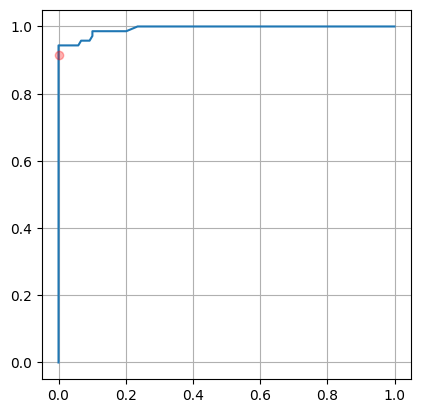

In [ ]:
p=y2d[:,1] # probabilidades
p[:10]
threshold = 0.34
print(confusion_matrix(y2,p>threshold)) # threshold de decisão, 0.5
print(classification_report(y2,p>threshold))

fp2, tp2 ,t = roc_curve(y2,p) # roc_curve tem de levar o valor discreto, e depois um valor continuo da previsão. fp = false positive, tp = true positive

plt.plot(fp2,tp2)
plt.plot(0, 65 / 71,'or',alpha=0.3)

plt.axis([0,1,0,1])
plt.axis('scaled')
plt.grid(True)
plt.show()


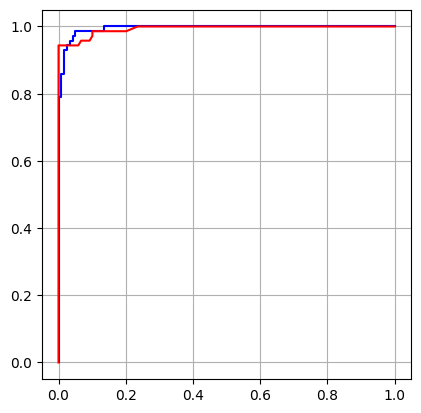

In [ ]:
# comparar curvas roc

plt.plot(fp,tp, 'b') # discriminante logistico (logistic regression)
plt.plot(fp2,tp2, 'r') # random forest

plt.axis([0,1,0,1])
plt.axis('scaled')
plt.grid(True)
plt.show()

plt.show()